# Data: Past, Present, Future
## Lab 10: supervised learning from perceptions to trees

Note to the reader: there was no Lab 8 or 9 because of the interruption in teaching.


# trees and forests

## supervised learning 


In [0]:
# We ran these above, but here for reference if you make your own trees
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)

In past weeks, we've shown you a standard way of "training" models. We've seen linear regression. Now we'll show how *almost the same process* is involved in much newer and shinier--if not always better machine learning models. Illustrate the standard scikit pipeline for training models.

Our dataset:

https://archive.ics.uci.edu/ml/datasets/Hepatitis

The attributes are:

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes 


In [0]:
names=['CLASS','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

In [0]:
hep_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', sep=',', header=None, na_values="?")

In [0]:
# works better if extract from pandas dataframe
# separate the existing classification (the diagnosis) from the features tested
hep_data_array=hep_data.values
y = hep_data_array[:,0]   #diagnosis
X = hep_data_array[:,1:19]  #features

In [0]:
hep_data[50:60]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
50,2,39,1,1.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,85.0,60.0,4.0,NaN,1
51,2,39,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,20.0,4.0,NaN,1
52,2,44,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.6,110.0,145.0,4.4,70.0,1
53,2,40,1,2.0,1,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.2,85.0,31.0,4.0,100.0,1
54,2,30,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,50.0,78.0,4.2,74.0,1
55,2,37,1,1.0,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.8,92.0,59.0,NaN,NaN,1
56,2,34,1,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
57,2,30,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,52.0,38.0,3.9,52.0,1
58,2,64,1,2.0,1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,80.0,38.0,4.3,74.0,1
59,2,45,2,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,85.0,75.0,NaN,NaN,1


This data has a problem: lots of question marks, imported as "NaN"s. scikit learn no friend of NaNs

In [0]:
#dodgy data munging!
#impute values to missing ones by using mean values of testing results. This may be a total garbage move. Is it?
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean') #axis=0
imp.fit(X)
X_imputed=imp.transform(X)

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

We need to pick out a subset of our data to "train" the model, and a subset to "test" the model. 

There are loads of ways to do this, but `sklearn` offers a simple function to do so.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.45, random_state=42)

Now we set up our classifier and fit the data using it.

In [0]:
dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(X_train, y_train) #fit on all the data


We can do a little bit of testing to see how well the classifier predicts using cross validation of the testing data.

In [0]:
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(clf, X_train, y_train)
scores_test = cross_val_score(clf, X_test, y_test)

In [0]:
scores_train

array([0.94117647, 0.82352941, 0.64705882, 0.94117647, 0.82352941])

In [0]:
scores_test

array([0.78571429, 0.78571429, 0.78571429, 0.71428571, 0.71428571])

Decision trees are cool in part because they "rate an A+ on interpretability" according to Breiman.
Let's see why.

In [0]:
## Google includes the package we need for visualization! 

#!conda install -y pydotplus

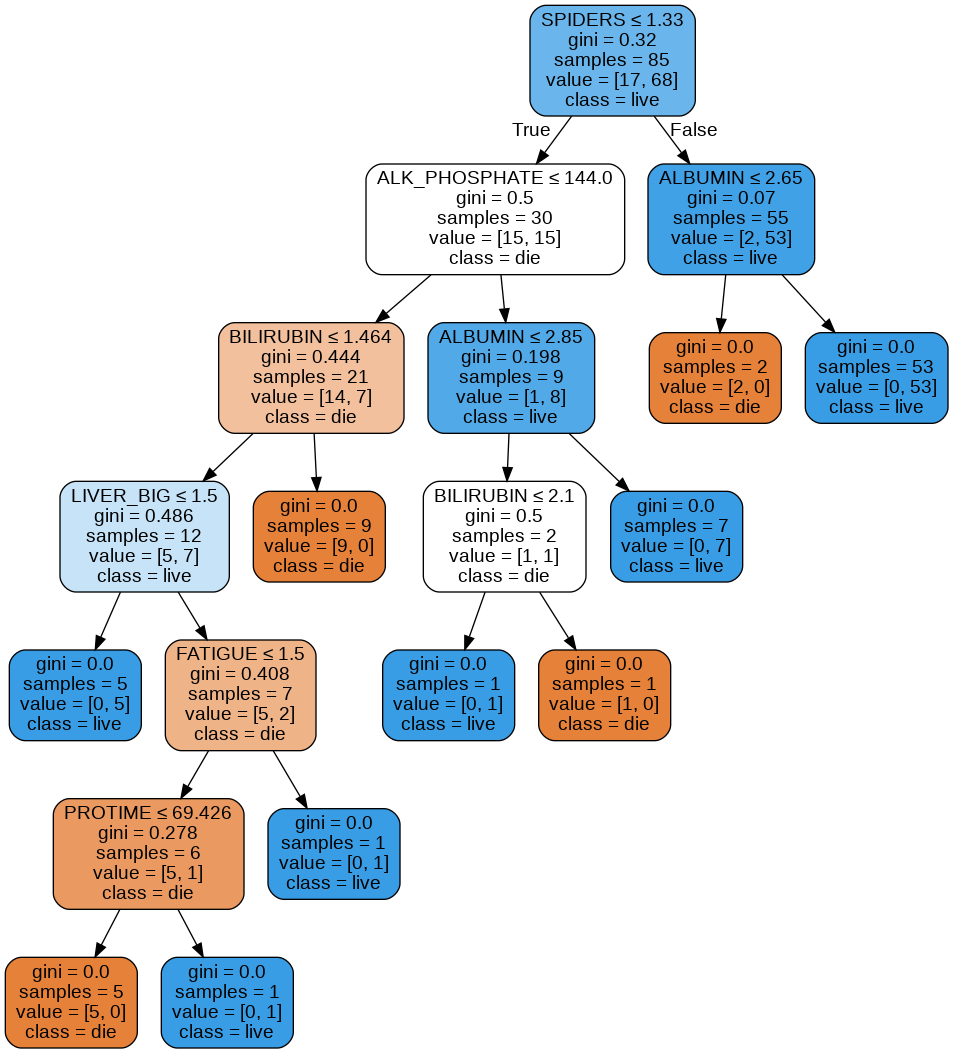

In [0]:
# show us the graph of the trees

from IPython.display import Image 
import pydotplus 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=names[1:19],  
                     class_names=['die', 'live'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Splitting Criterion

What is gini, I hear you cry. 

It's the *splitting criterion* that the decision tree algorithm defaults to.

[Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

"Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset."

To compute Gini impurity for a set of items with $J$ classes, suppose $i \in \{1, 2, ...,J\}$, and let $f_i$ be the fraction of items labeled with class $i$ in the set.

$I_{G}(f) = \sum_{i=1}^{J} f_i (1-f_i) = \sum_{i=1}^{J} (f_i - {f_i}^2) = \sum_{i=1}^J f_i - \sum_{i=1}^{J} {f_i}^2
 = 1 - \sum^{J}_{i=1} {f_i}^{2} = \sum_{i\neq k}f_i f_k$

## Overfitting

trees are very prone to *overfitting* 

![overfitting](http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)


among the many techniques for dealing with this:

- constrain the depth of the trees using `max_depth=` 
- reduce the number of features training on
- random sampling


Take five minutes to change the default settings--can you make a more predictive decision tree?

In [0]:
DecisionTreeClassifier??

In [0]:
# Decision Trees in Time of Covid


## Random forests

dramatically increase predictive power at the cost of interpretability

combine 

![forests](https://dimensionless.in/wp-content/uploads/RandomForest_blog_files/figure-html/voting.png)

In [0]:
# Build a forest and compute the feature importances
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
forest = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
clf=forest.fit(X_train, y_train)

In [0]:
scores = cross_val_score(clf, X_test, y_test)

In [0]:
scores

array([0.78571429, 0.92857143, 0.78571429, 0.85714286, 0.78571429])

Breiman:

>...forests are A+ predictors But their mechanism for producing a prediction is difficult to understand. Trying to delve into the tangled web that generated a plurality vote from 100 trees is a Herculean task. So on interpretability they rate an F.

# Decision Trees in the Time of COVID

The following drawing heavily from https://github.com/parthskuc/Predicitng-Covid-19-Coronavirus-in-patients

Based on a data science challenge at Kaggle:

>Background
>
>The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.
>
Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.
>
Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.
>
One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.
Dataset
>
This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.
>
All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation. 
>


### Loading required libraries

In [0]:
import pandas as pd
import numpy as np

import pydotplus
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Loading the data

In [0]:
df=pd.read_excel("https://github.com/parthskuc/Predicitng-Covid-19-Coronavirus-in-patients/blob/master/dataset.xlsx?raw=true")

In [0]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Studying the data

In [0]:
print(f"Num rows: {len(df)}")
print(f"Num columns: {len(df.columns)}")

Num rows: 5644
Num columns: 111


In [0]:
df.groupby("SARS-Cov-2 exam result").count()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,5086,5086,5086,5086,5086,520,520,519,518,519,519,519,519,519,519,519,519,518,519,175,1242,1242,1242,1240,1240,1240,0,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,438,338,...,49,58,58,58,58,48,1,58,57,50,0,58,58,58,56,57,58,58,0,76,110,75,0,3,81,21,14,5,0,13,14,14,14,14,14,14,14,11,19,14
positive,558,558,558,558,558,83,83,83,81,83,83,83,83,83,83,83,83,83,83,33,112,112,112,112,112,112,0,112,112,112,112,112,112,112,112,112,112,112,75,59,...,11,12,12,12,12,9,0,12,12,10,0,12,12,12,11,12,12,12,0,15,23,26,0,0,23,2,13,3,0,0,13,13,13,13,13,13,13,9,1,13


In [0]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [0]:
# understand data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,5644,5644,f10cde6457d919c,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),27,NaN,NaN,NaN,6.07084e-09,1.01905,-2.98559,-0.539721,0.0563319,0.50851,2.02947
pO2 (arterial blood gas analysis),27,NaN,NaN,NaN,-2.46973e-08,1.01905,-1.17591,-0.81699,-0.159955,0.450009,2.20537
Arteiral Fio2,20,NaN,NaN,NaN,4.65661e-09,1.02598,-1.53293,-0.121498,-0.0117437,-0.0117437,2.84186
Phosphor,20,NaN,NaN,NaN,6.33299e-09,1.02598,-1.48053,-0.55273,-0.138182,0.276365,2.86235


### The data is unbalanced (approximatly 90%-10% negative-positive), which will bias any statistical model.

### Let's look at the number and percentage of missing values in each column

In [0]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [0]:
missing_data(df)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,5042,5042,5043,5042,5436,4290,4290,4290,4292,4292,4292,5644,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,5131,...,5584,5574,5574,5574,5574,5587,5643,5574,5575,5584,5644,5574,5574,5574,5577,5575,5574,5574,5644,5553,5511,5543,5644,5641,5540,5621,5617,5636,5644,5631,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0,0,0,0,0,0,89.3161,89.3161,89.3338,89.387,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3515,89.3338,96.3147,76.0099,76.0099,76.0099,76.0454,76.0454,76.0454,100,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,90.9107,...,98.9369,98.7597,98.7597,98.7597,98.7597,98.9901,99.9823,98.7597,98.7775,98.9369,100,98.7597,98.7597,98.7597,98.8129,98.7775,98.7597,98.7597,100,98.3877,97.6435,98.2105,100,99.9468,98.1573,99.5925,99.5216,99.8583,100,99.7697,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.6456,99.6456,99.5216
Types,object,int64,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,...,object,object,object,object,object,object,object,float64,object,object,float64,object,object,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


### Plotting the percentage of missing data variable wise

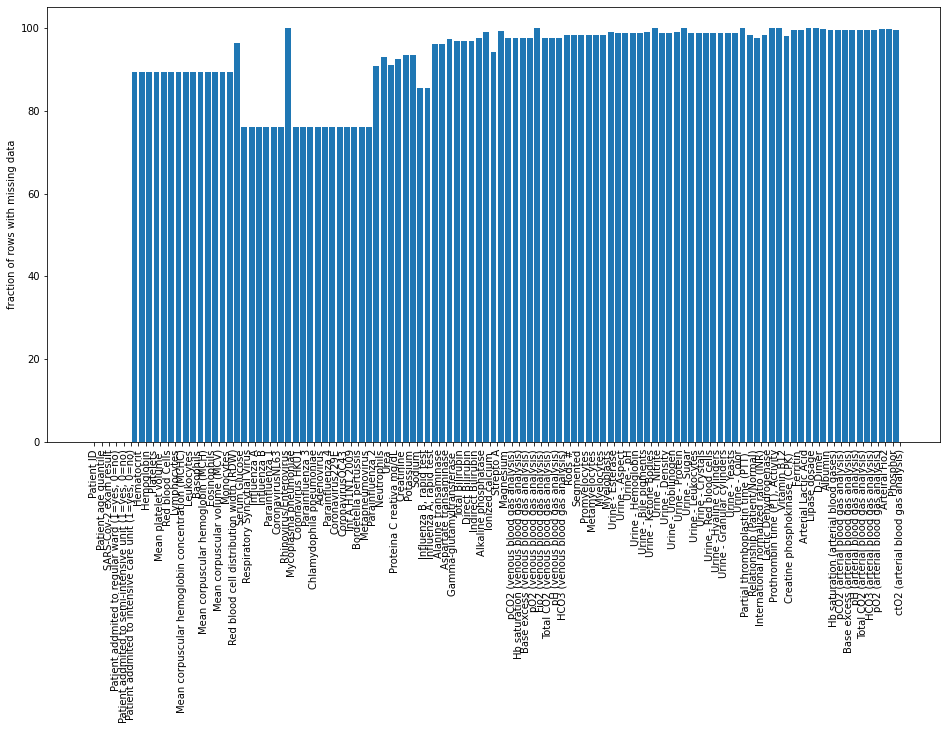

In [0]:
null_perc = df.isnull().sum()*100/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_perc))+0.5,null_perc.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_perc)),null_perc)
plt.show()

### Based on this plot, It's clear that this dataset has a lot of missing values. Only 6 columns have no null values. There are features with 100% NULL. 

In [0]:
df1=df.copy()
df1['count'] = 1

#### The number of possible positive tested patients is equally distributed across age quantiles, except for the first two quantiles.

### Checking Correlation between variables

## First try...
### We will check the columns that have full data and are not null to build a model.

In [0]:
data_null=df.isna().sum()
(data_null/df.shape[0]*100).round(2)
#collect columns with good data
good_columns = data_null[data_null==0].reset_index()
good_columns

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0
5,Patient addmited to intensive care unit (1=yes...,0


In [0]:
#create a new dataframe with good columns
data1=df[good_columns['index']]
data1.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [0]:
# dropping the non numeical column as it will not be used in the modelling process.
data1 = data1.drop([
    "Patient ID",], axis=1)

In [0]:
# get the target variable
target = data1['SARS-Cov-2 exam result']


In [0]:
# all the other columns for training the model
expl = data1.drop(columns='SARS-Cov-2 exam result')

In [0]:
feature_cols = ['Patient age quantile','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)']


In [0]:
#split into training and testing
X_treino, X_teste, Y_treino, Y_teste = train_test_split(expl, target, test_size=0.3, random_state=30)

In [0]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_treino, Y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Model validation

In [0]:
#check score training data
print(round(model_tree.score(X_treino, Y_treino)*100,2), '%')

90.63 %


In [0]:
#check score test data
print(round(model_tree.score(X_teste, Y_teste)*100,2),'%')

89.79 %


In [0]:
#check confusion matrix

confusion_matrix(Y_teste, model_tree.predict(X_teste))

array([[1515,    6],
       [ 167,    6]])

In [0]:
Y_pred_tree=model_tree.predict(X_teste)
print("Classification Report")
print(metrics.classification_report(Y_teste, Y_pred_tree,digits=4))

Classification Report
              precision    recall  f1-score   support

    negative     0.9007    0.9961    0.9460      1521
    positive     0.5000    0.0347    0.0649       173

    accuracy                         0.8979      1694
   macro avg     0.7004    0.5154    0.5054      1694
weighted avg     0.8598    0.8979    0.8560      1694



### Plotting the decision tree

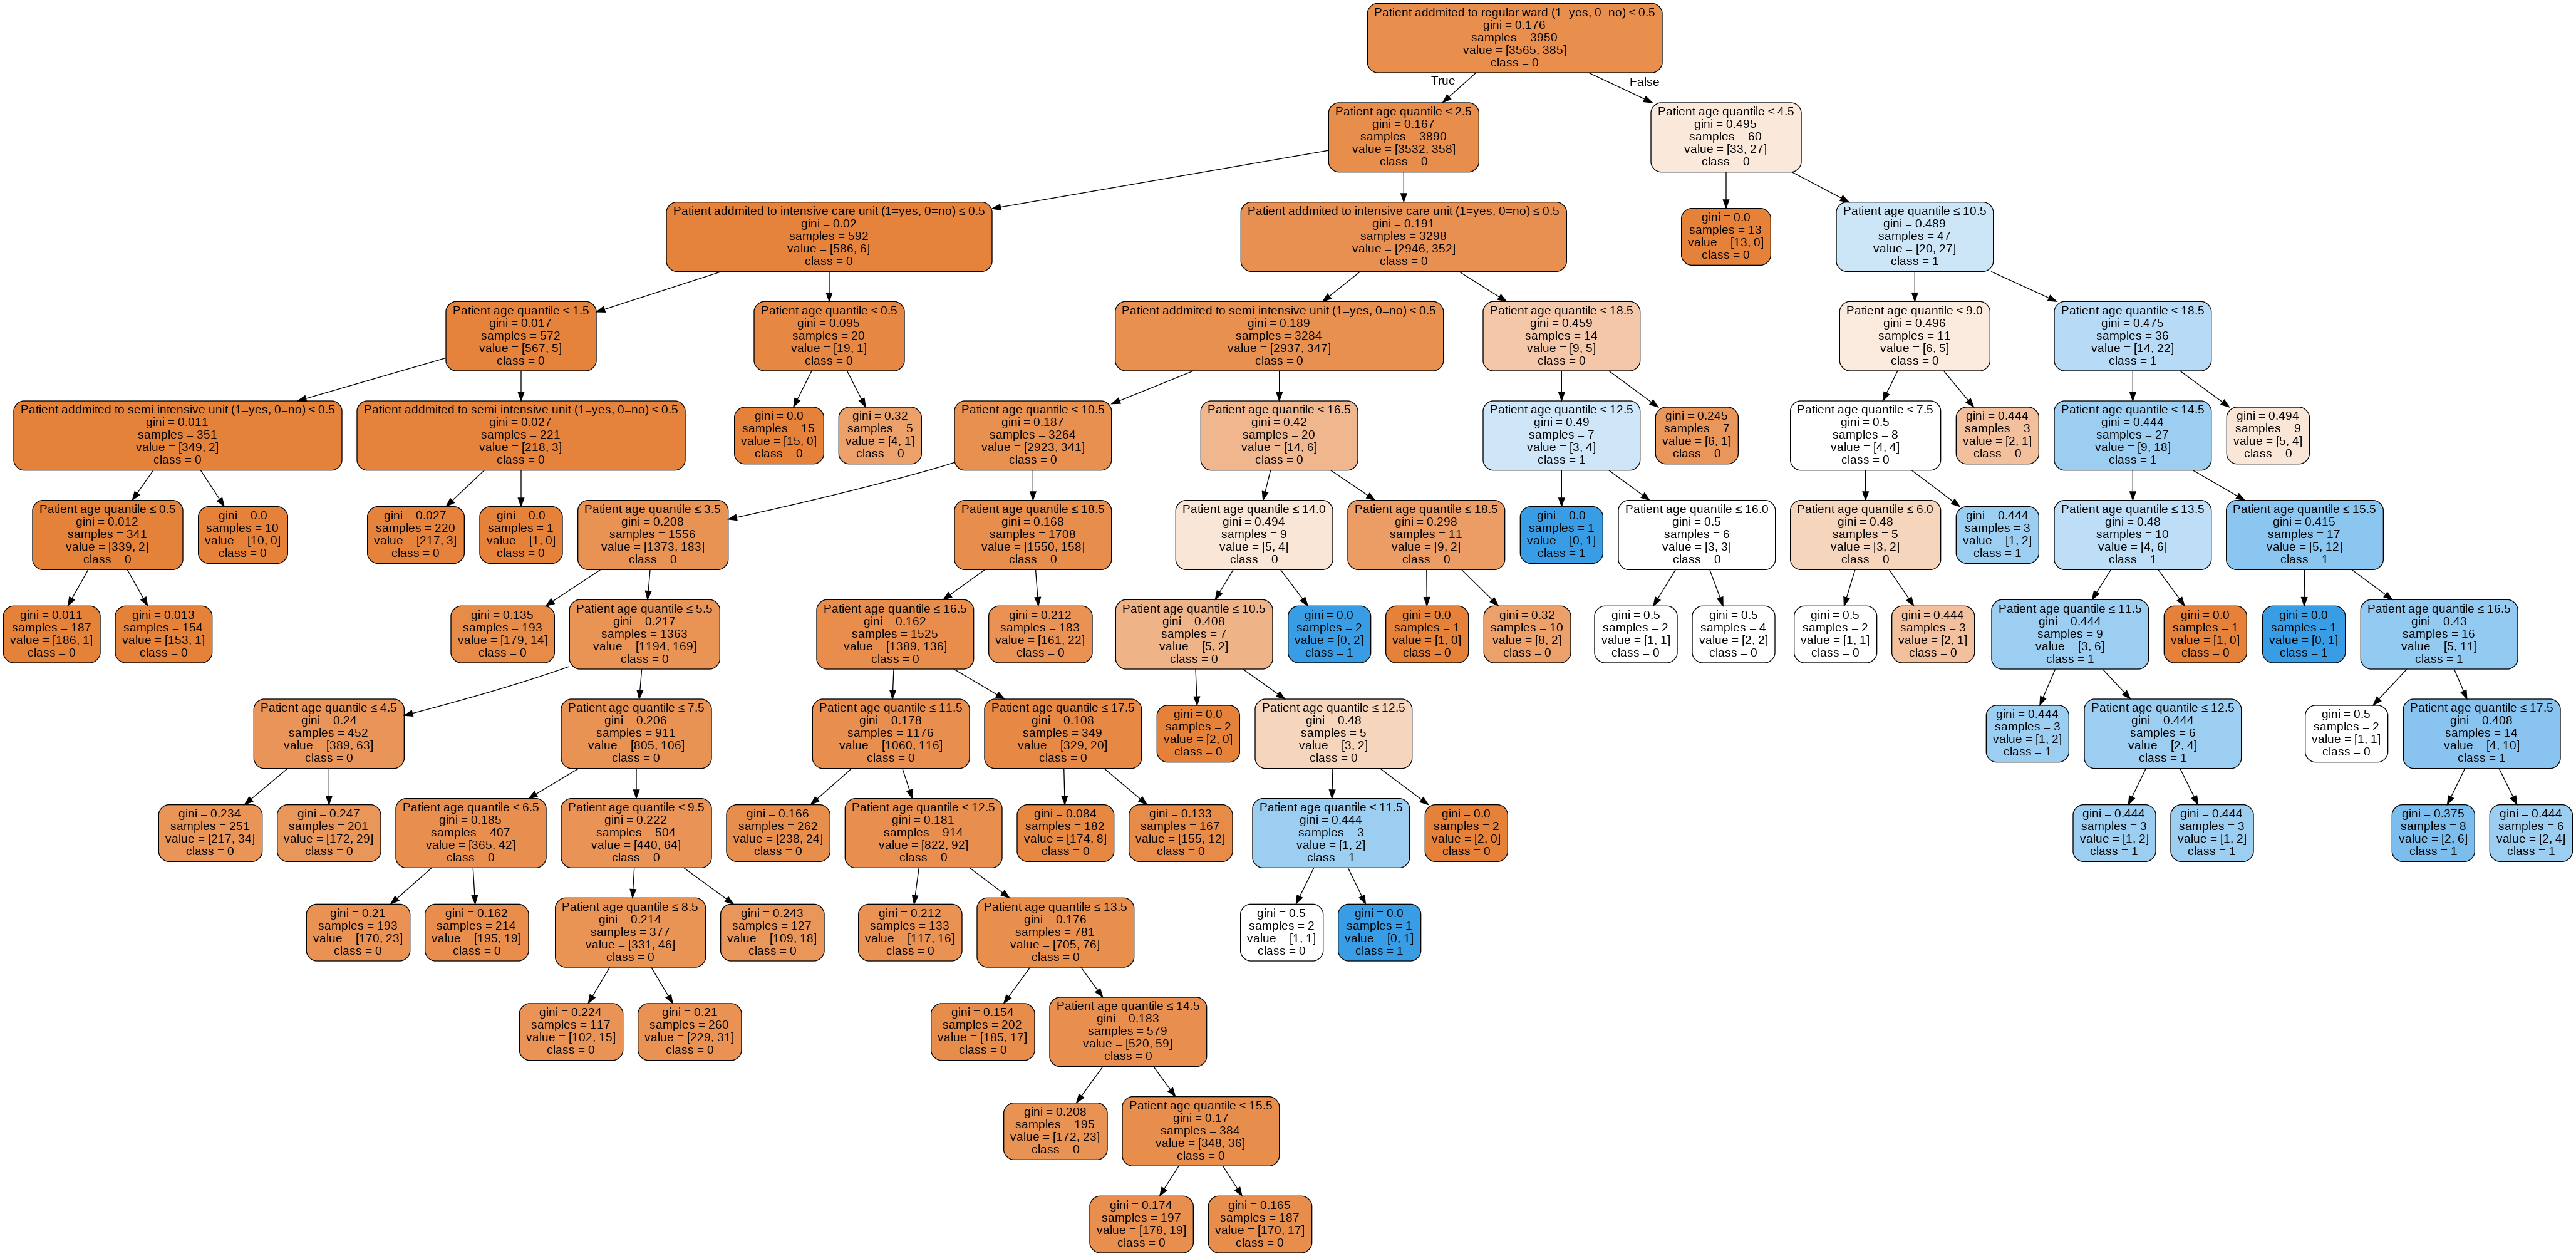

In [0]:
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('COVID.png')
Image(graph.create_png())

# The birth, death, and rebirth of the Perceptron


The researchers McCulloch & Pitts, inspired both by Turing's
1936 paper on universal computation but also what
was known about neuron electophysiology at the time,
proposed the first artificial neural net abstraction. They
(incorrectly) claimed that such a network could embody
what we would now call a Turing machine, capable of any
computation.

Later, the psychologist Frank Rosenblatt proposed
a model to instantiate this in a mechanical computer -- not
as "software" but as a specialized piece of electronics
in the same way Claude Shannon's Theseus mouse was a special
purpose computer. ![perceptron](https://i.imgur.com/Xin4gI5.png)

Check out his short paper https://psycnet.apa.org/fulltext/1959-09865-001.pdf or http://www.dtic.mil/docs/citations/AD0256582 for a detailed (>28MB) report.

Rosenblatt considered one output that took many signals
as input. ![logical](https://i.stack.imgur.com/1c2Mb.png)

In a way this is like multivariate regression
as studied by Yule for looking at English poverty at the
end of the 19th century.

The perceptron is an example of what is called "supervised learning," because it learns to classify data based on a "training set" that is already classified. 

Using a training set of vectors that are each classfied as being on one or the other side of a line, the perceptron learns how to divide such vectors. Ye olde mandatory Wikipedia diagramme: ![wikilinearclassified](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/1224px-Perceptron_example.svg.png)

He proposed a rule in which one chooses either 1 new
example or chooses one example at random to update the
separating hyper-plane -- the line that separates "+"
from "-" examples as in:
![plusminus](https://camo.githubusercontent.com/8d668489613be0b9435044f224ef32a25ae30d74/687474703a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f626c6f672f323031352f73696e676c656c617965725f6e657572616c5f6e6574776f726b735f66696c65732f70657263657074726f6e5f62696e6172792e706e67)

The amount that the weights of each "neuron" changes
are determined by walking down a "hill" in the space
of weights, where the hill is higher if you are misclassifying
many examples. The slope of the hill is called its gradient, 
and since this technique chooses an example at
random it's called stochastic gradient descent.

In this way we know we won't get one unique answer;
we might get an answer that's pretty good though.

Not surprisingly, `python` has a robust perceptron implementation in `scikit learn`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

%matplotlib inline


Let's take the example of a series of x,y coordinates that are classified into two classes. We'll use a pandas data frame, cuz pandas are nice. 

In [0]:
# this example adapted from http://stamfordresearch.com/python-perceptron-re-visited/

A = [2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5]
B = [2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
classification = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]

trainingdata = pd.DataFrame({
'A' : A ,
'B' : B ,
'classification' : classification
})

# Targets here means the classification of each point. So (2,2) is 0, and (2,4) is 1


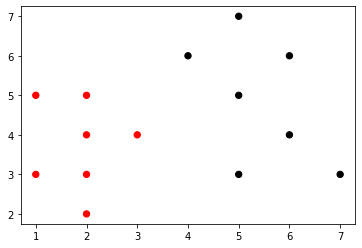

In [0]:
# Let's just graph these, with the points classified as 0 and 1 in different colors

colormap = np.array(['r', 'k'])
 
# Plot the data, A is x axis, B is y axis
# and the colormap is applied based on the classification
plt.scatter(trainingdata.A, trainingdata.B, c=colormap[trainingdata.classification], s=40)

In this case, pretty easy to anticipate that this training set of points could be classified using a line.

A perceptron is one algorithm for 'learning' such a line. In scikit learn, we set up out classifier and then tell it to build a classifier using the training data.

In [0]:
Perceptron?


In [0]:
# First, set up the classfier by creating the perceptron object (net)
net = Perceptron(n_iter_no_change=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
 
# Then use the training data using the perceptron object (net)
net.fit(trainingdata[['A', 'B']],trainingdata['classification'])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.002,
           fit_intercept=True, max_iter=1000, n_iter_no_change=100, n_jobs=None,
           penalty=None, random_state=None, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Hey, what's my line?

In [0]:
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))

Coefficient 0 0.03599999999999999
Coefficient 1 -0.016
Bias [-0.044]


Plot the data and the line (the "decision boundary")

(0.0, 8.0)

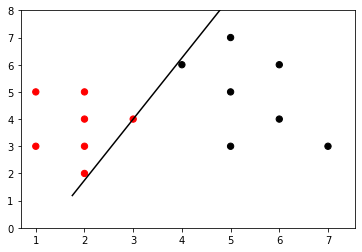

In [0]:

# Plot the original data
plt.scatter(trainingdata.A, trainingdata.B, c=colormap[trainingdata.classification], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

So, based on this trained classifier, we can make predictions about other data. 

Let's consider (7,2) and (2,7)

`net.predict` will use the trained classifier to make a prediction, like so:

In [0]:
pred = net.predict([[7,2],[2,7]])

In [0]:
print(pred)

[1 0]


## Targeted death of the perceptron

Symbolic AI practitioners no friend to neural nets as a research program that might draw funding and computing time away from their efforts. Major technical effort to undermine perceptron as a research program.

> In the middle 1960s Papert and Minsky set out to kill the perceptron, or, at least, to establish its limitations--a task Minsky felt was a sort of social service they could perform for the artificial intelligence community. [quoted in Olazaran, 628]

Minsky noted,

> Part of our drive came . . . from the fact that funding and research energy were being dissapated on . . . misleading attempt to use connectionist methods in practical applications. [ibid, 628]

Other forms of pattern recognition would be the future for AI. 

Many critical complaints, but key one for future research:

Many crucial things not linearly separable, notably the simple logical operation XOR

![xor](http://www.theprojectspot.com/images/post-assets/ls.jpg)


## Rebirth

- multilayer

![multilayer](https://i.imgur.com/E1Pqfbn.png)


https://en.wikipedia.org/wiki/Hacker_koan#Uncarved_block

    In the days when Sussman was a novice, Minsky once came to him as he sat hacking at the PDP-6.

    "What are you doing?", asked Minsky.
    "I am training a randomly wired neural net to play Tic-tac-toe", Sussman replied.
    "Why is the net wired randomly?", asked Minsky.
    "I do not want it to have any preconceptions of how to play", Sussman said.

    Minsky then shut his eyes.
    "Why do you close your eyes?" Sussman asked his teacher.
    "So that the room will be empty."
    At that moment, Sussman was enlightened. 
    
Story told in Levy, *Hackers*
    
    So Sussman began working on a program. Not long after, this odd-looking bald guy came over. Sussman figured the guy was going to boot him out, but instead the man sat down, asking, "Hey, what are you doing?" Sussman talked over his program with the man, Marvin Minsky. At one point in the discussion, Sussman told Minsky that he was using a certain randomizing technique in his program because he didn't want the machine to have any preconceived notions. Minsky said, "Well, it has them, it's just that you don't know what they are." It was the most profound thing Gerry Sussman had ever heard. And Minsky continued, telling him that the world is built a certain way, and the most important thing we can do with the world is avoid randomness, and figure out ways by which things can be planned. Wisdom like this has its effect on seventeen-year-old freshmen, and from then on Sussman was hooked.


